In [8]:
import os
import numpy as np
import cv2
import torch
import matplotlib.pyplot as plt

In [2]:
IMG_FOLDER = "imgs"
MODEL_PATH = "mnist-12-int8.onnx"

In [ ]:
def load_images(img_path):
    img_list = []
    for img_name in os.listdir(img_path):
        img = cv2.imread(os.path.join(img_path, img_name))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray = cv2.resize(gray, (28, 28))
        gray = gray.astype(np.float32) / 255.0
        gray = np.expand_dims(gray, axis=0)
        img_list.append(gray)
    return img_list

def predict_image(img_list, model_path):
    outputs = []
    model = cv2.dnn.readNetFromONNX(model_path)
    for image in img_list:
        blob = cv2.dnn.blobFromImage(
            image, scalefactor=1 / 255.0, size=(28, 28), swapRB=False,
        )
        model.setInput(blob)
        output = model.forward()
        outputs.append(output)
    return outputs

TypeError: Invalid shape (1, 28, 28) for image data

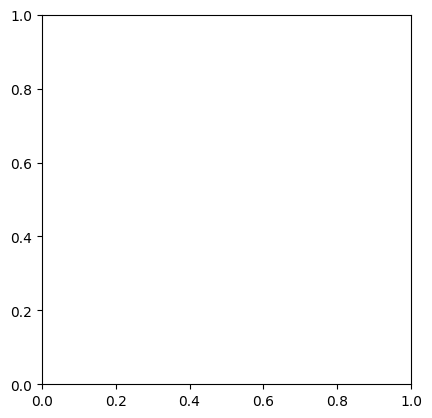

In [52]:
images = load_images(IMG_FOLDER)
plt.imshow(images[0], cmap="gray")


In [48]:
outputs = predict_image(images, MODEL_PATH)

In [49]:
outputs

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)]

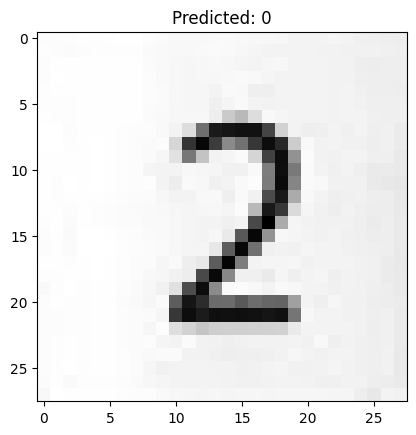

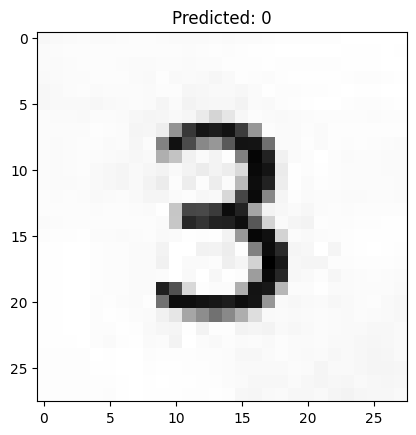

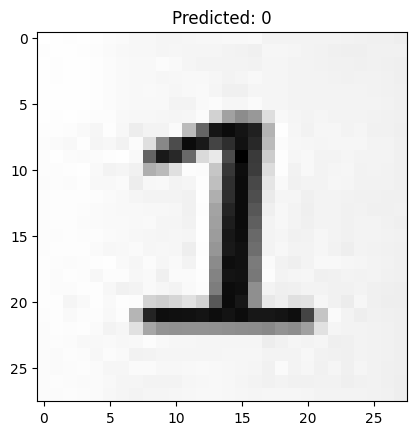

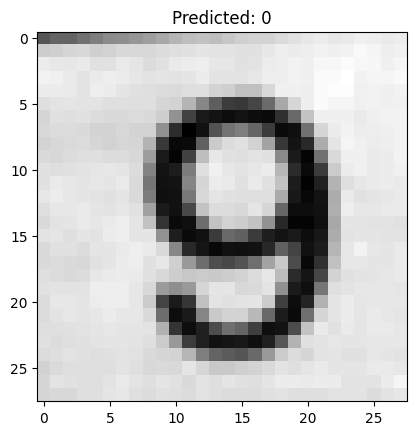

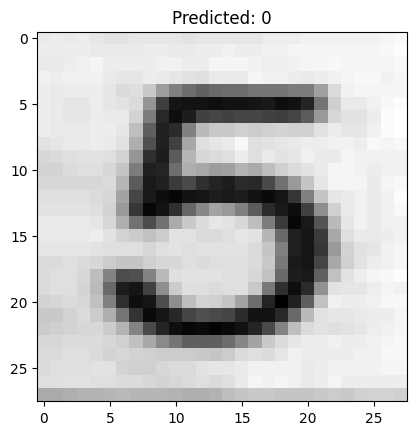

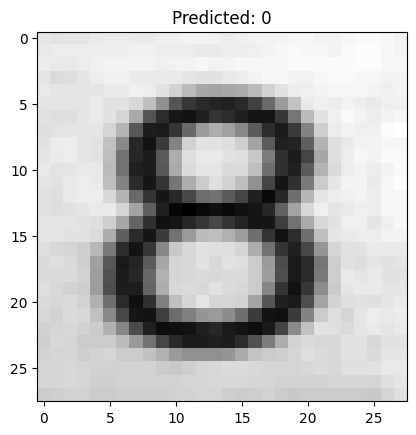

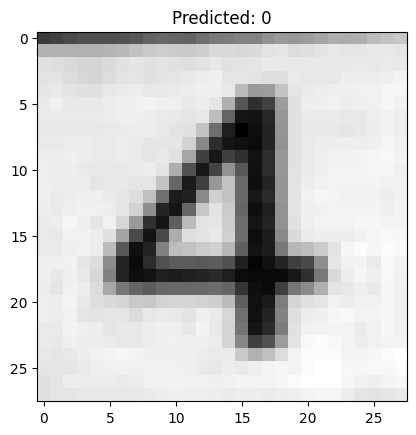

In [50]:
for i, image in enumerate(images):
    plt.imshow(image, cmap="gray")
    plt.title(f"Predicted: {torch.argmax(torch.tensor(outputs[i]))}")
    plt.show()